<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import random 
import seaborn as sns

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
# Setting up 'requests to make HTTPS requests properly takes some extra steps...
requests.packages.urllib3.disable_warnings()

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading the csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PatientInfo.csv')

In [ ]:
df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



This is a dataset containing information about patients infected with corona virus in South Korea. It contains their gender, location, infection cause, age, releasing dates, their state in the moment etc. 

Visualize the target column

## Distribution across provinces

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

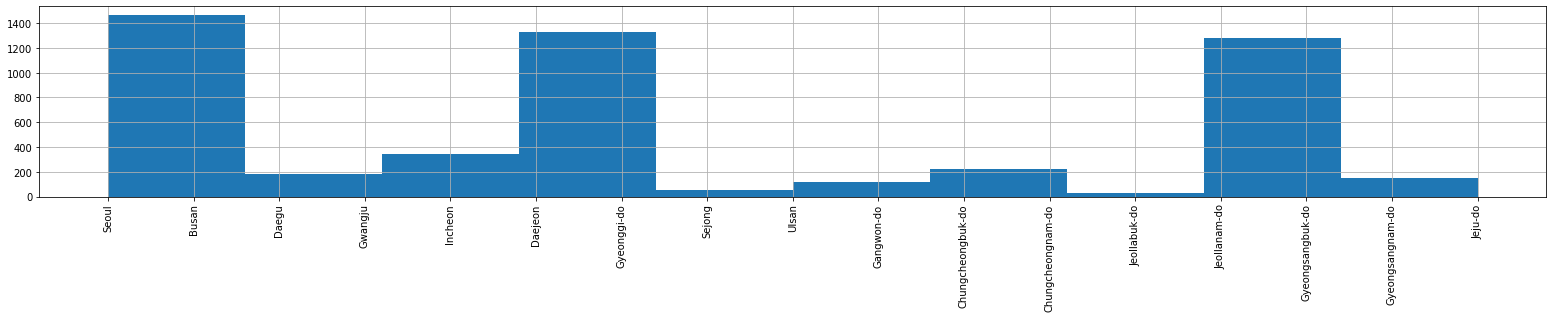

In [ ]:
df.province.hist()
plt.xticks(rotation=90)

## Distribution in infection cause

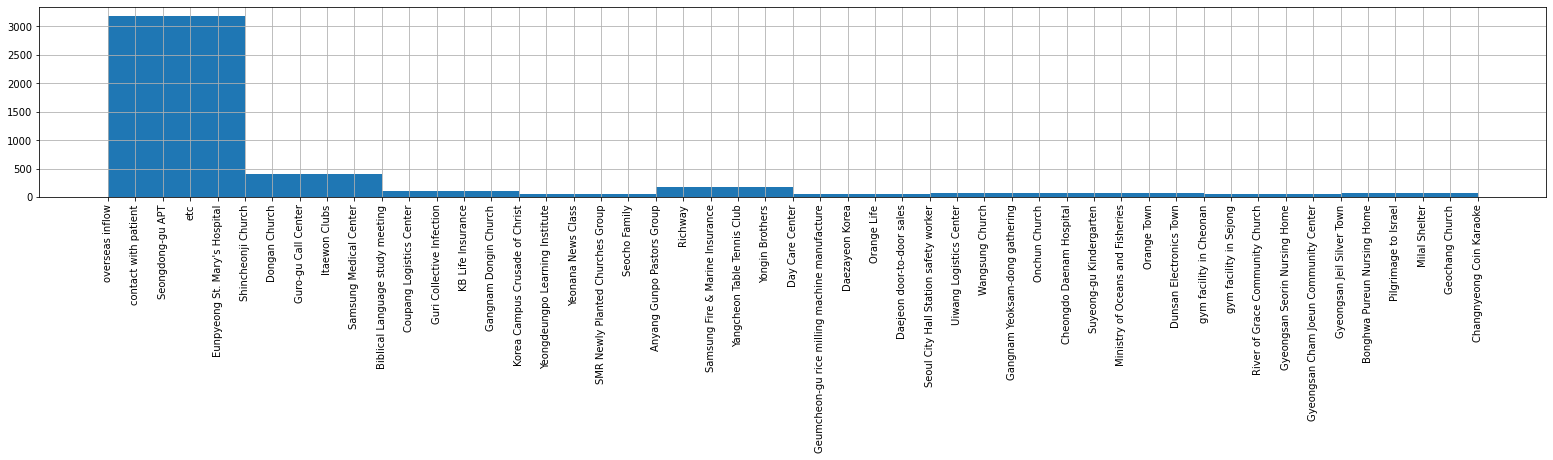

In [ ]:
df.infection_case.hist()
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [27, 3.50]

## Distribution by age

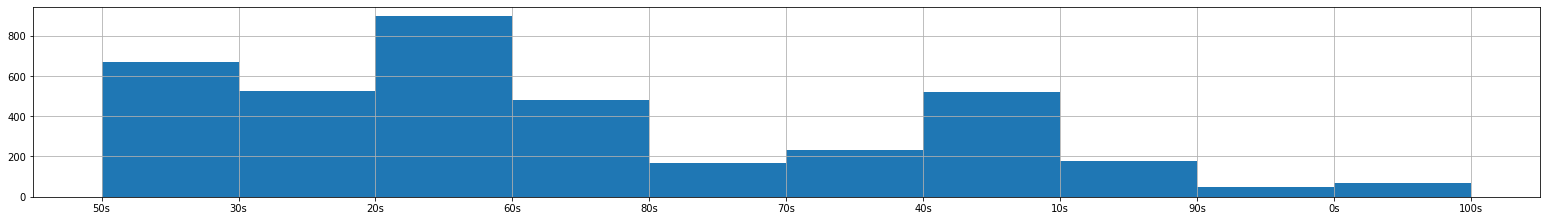

In [ ]:
df.age.hist()

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [ ]:
df_missing_values = df.isnull().sum()
df_missing_values

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [ ]:
df_missing_percent = df.isnull().sum()/len(df) * 100
df_missing_percent

patient_id             0.000000
sex                   21.723136
age                   26.718296
country                0.000000
province               0.000000
city                   1.819942
infection_case        17.792836
infected_by           73.939981
contact_number        84.685382
symptom_onset_date    86.640852
confirmed_date         0.058083
released_date         69.273959
deceased_date         98.722168
state                  0.000000
dtype: float64

In [ ]:
df_missing = pd.concat([df_missing_values,df_missing_percent],axis=1)
df_missing

,0,1
patient_id,0,0.000000
sex,1122,21.723136
age,1380,26.718296
country,0,0.000000
province,0,0.000000
city,94,1.819942
infection_case,919,17.792836
infected_by,3819,73.939981
contact_number,4374,84.685382
symptom_onset_date,4475,86.640852


Visualize the missing values using Missingno library

In [ ]:
import missingno as msno

In [ ]:
msno.bar(df)

## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

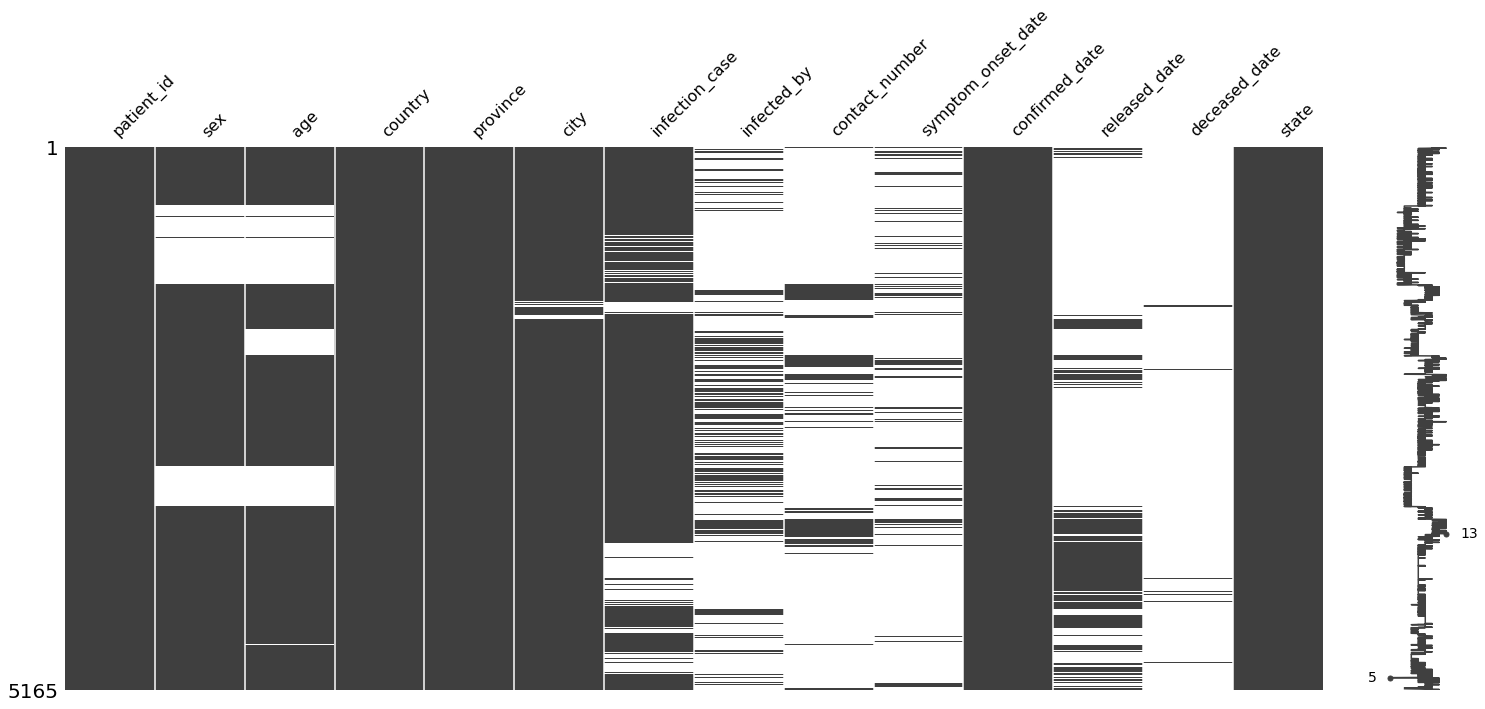

In [ ]:
msno.matrix(df)

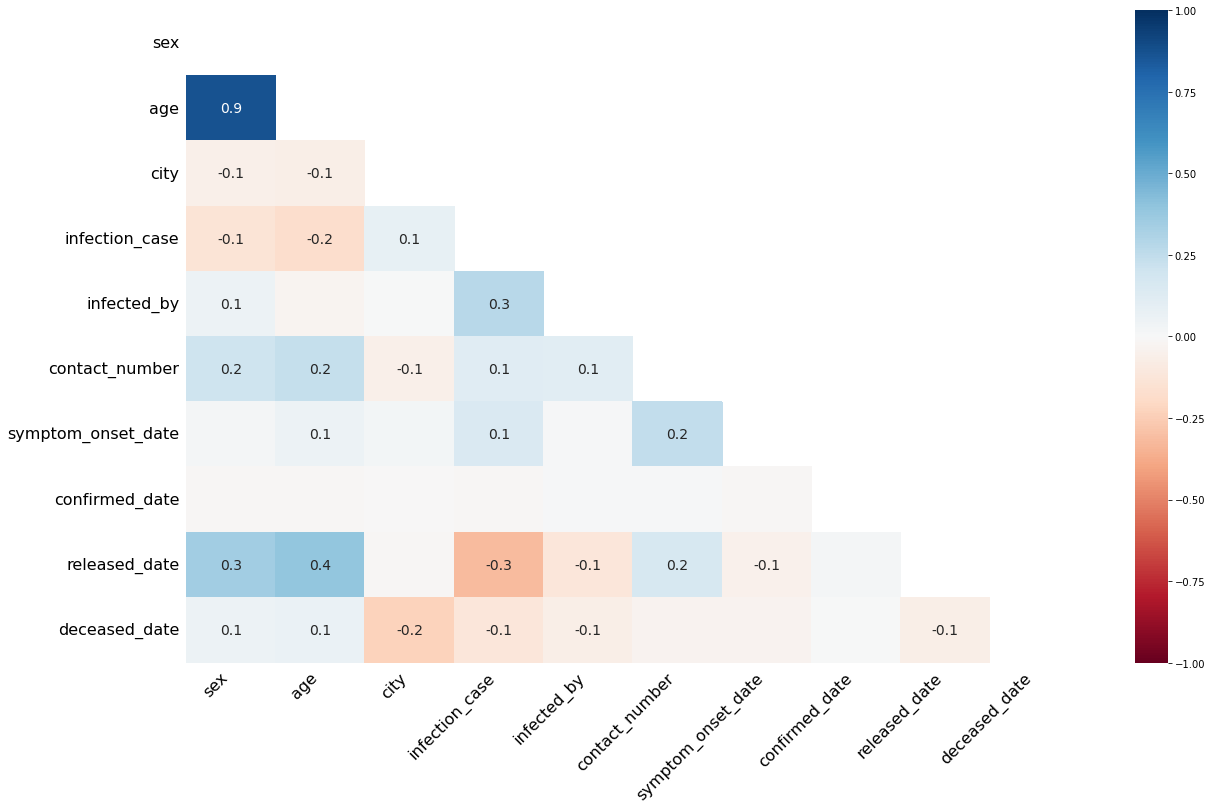

In [ ]:
msno.heatmap(df)

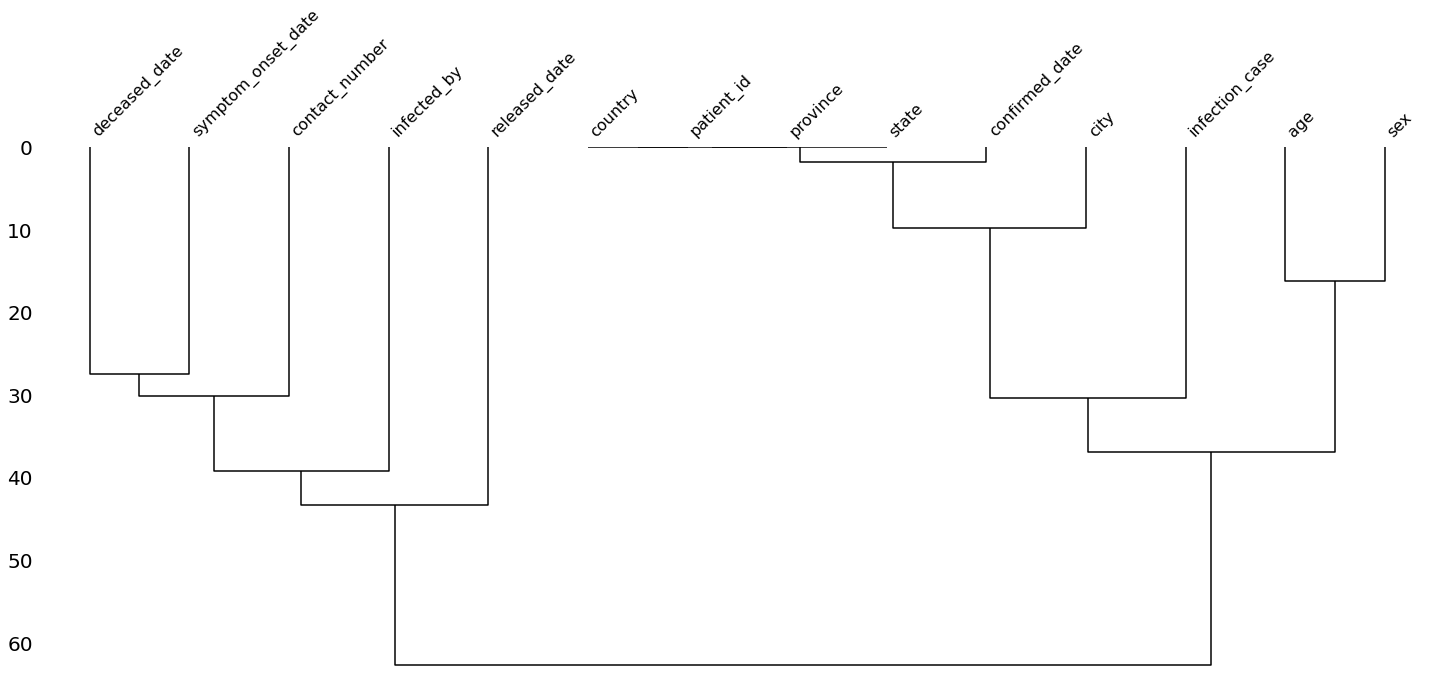

In [ ]:
msno.dendrogram(df)

Write the reasons for the missing values

We see that generally we dont have high dependencies of missingness among features , except age and sex which is 0.9 on the heat map meaning when age is missing probably their sex is also missing, i can speculate that questioning he patient is not present, because it can go the opposite way meaning whenever we have data about someone about their age we have also about their sex, this is called missing not at random.The second highest is 0.4 between age and released date, why is that i don't know 😀

## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [ ]:
df.shape

(5165, 14)

In [ ]:
df_copy = df.copy()

droping column 'deceased_date' because it has 99 percent missing values and droping column 'symptom_onset_date' because it has 87 percent missing values.

In [ ]:
df_copy.drop('deceased_date', inplace=True, axis=1)

In [ ]:
df_copy.drop('symptom_onset_date', inplace=True, axis=1)

In [ ]:
df_copy.drop('infected_by', inplace=True, axis=1)

In [ ]:
df_copy

,patient_id,sex,age,country,province,city,infection_case,contact_number,confirmed_date,released_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,2020-01-23,2020-02-05,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,2020-01-30,2020-03-02,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,2020-01-30,2020-02-19,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,2020-01-30,2020-02-15,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,2020-01-31,2020-02-24,released
...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,25,2020-05-30,2020-06-13,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,2020-06-16,2020-06-24,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,72,2020-06-18,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,2020-06-18,NaN,isolated


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_copy.isnull().sum()

patient_id           0
sex               1122
age               1380
country              0
province             0
city                94
infection_case     919
contact_number    4374
confirmed_date       3
released_date        0
state                0
dtype: int64

In [ ]:
df_copy.released_date[60:90]

60    2020-03-14
61           NaN
62    2020-03-03
63    2020-03-04
64    2020-03-14
65    2020-03-04
66           NaN
67    2020-03-20
68           NaN
69           NaN
70    2020-03-18
71    2020-03-03
72           NaN
73    2020-03-04
74           NaN
75    2020-03-14
76           NaN
77           NaN
78           NaN
79           NaN
80    2020-03-20
81           NaN
82           NaN
83           NaN
84    2020-03-17
85           NaN
86           NaN
87           NaN
88           NaN
89           NaN
Name: released_date, dtype: object

We can go with fillna because is date and is time series

In [ ]:
df_copy['released_date'].fillna(method='ffill',inplace=True)
df_copy.released_date[60:90]

60    2020-03-14
61    2020-03-14
62    2020-03-03
63    2020-03-04
64    2020-03-14
65    2020-03-04
66    2020-03-04
67    2020-03-20
68    2020-03-20
69    2020-03-20
70    2020-03-18
71    2020-03-03
72    2020-03-03
73    2020-03-04
74    2020-03-04
75    2020-03-14
76    2020-03-14
77    2020-03-14
78    2020-03-14
79    2020-03-14
80    2020-03-20
81    2020-03-20
82    2020-03-20
83    2020-03-20
84    2020-03-17
85    2020-03-17
86    2020-03-17
87    2020-03-17
88    2020-03-17
89    2020-03-17
Name: released_date, dtype: object

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_titanic = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')

In [ ]:
scaler.fit_transform(df['contact_number'])

ValueError: ignored

In [ ]:
df_copy

,patient_id,sex,age,country,province,city,infection_case,contact_number,confirmed_date,released_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,75,2020-01-23,2020-02-05,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,31,2020-01-30,2020-03-02,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,17,2020-01-30,2020-02-19,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,9,2020-01-30,2020-02-15,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,2,2020-01-31,2020-02-24,released
...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,25,2020-05-30,2020-06-13,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,2020-06-16,2020-06-24,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,72,2020-06-18,2020-06-24,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,2020-06-18,2020-06-24,isolated


# <font color = 'Orange'>Encode non numerical data</font>

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()

In [ ]:
df_copy['country'] = lb.fit_transform(df_copy['country'])

In [ ]:
df_copy

,patient_id,sex,age,country,province,city,infection_case,contact_number,confirmed_date,released_date,state
0,1000000001,male,50s,8,Seoul,Gangseo-gu,overseas inflow,75,2020-01-23,2020-02-05,released
1,1000000002,male,30s,8,Seoul,Jungnang-gu,overseas inflow,31,2020-01-30,2020-03-02,released
2,1000000003,male,50s,8,Seoul,Jongno-gu,contact with patient,17,2020-01-30,2020-02-19,released
3,1000000004,male,20s,8,Seoul,Mapo-gu,overseas inflow,9,2020-01-30,2020-02-15,released
4,1000000005,female,20s,8,Seoul,Seongbuk-gu,contact with patient,2,2020-01-31,2020-02-24,released
...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,8,Jeju-do,Jeju-do,overseas inflow,25,2020-05-30,2020-06-13,released
5161,7000000016,NaN,NaN,8,Jeju-do,Jeju-do,overseas inflow,NaN,2020-06-16,2020-06-24,released
5162,7000000017,NaN,NaN,0,Jeju-do,Jeju-do,overseas inflow,72,2020-06-18,2020-06-24,isolated
5163,7000000018,NaN,NaN,0,Jeju-do,Jeju-do,overseas inflow,NaN,2020-06-18,2020-06-24,isolated


# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [ ]:
df_copy.to_csv('/content/drive/MyDrive/lab2_data.csv')

Print the first rows of your final Dataset

In [ ]:
df_copy.head(10)

,patient_id,sex,age,country,province,city,infection_case,contact_number,confirmed_date,released_date,state
0,1000000001,male,50s,8,Seoul,Gangseo-gu,overseas inflow,75,2020-01-23,2020-02-05,released
1,1000000002,male,30s,8,Seoul,Jungnang-gu,overseas inflow,31,2020-01-30,2020-03-02,released
2,1000000003,male,50s,8,Seoul,Jongno-gu,contact with patient,17,2020-01-30,2020-02-19,released
3,1000000004,male,20s,8,Seoul,Mapo-gu,overseas inflow,9,2020-01-30,2020-02-15,released
4,1000000005,female,20s,8,Seoul,Seongbuk-gu,contact with patient,2,2020-01-31,2020-02-24,released
5,1000000006,female,50s,8,Seoul,Jongno-gu,contact with patient,43,2020-01-31,2020-02-19,released
6,1000000007,male,20s,8,Seoul,Jongno-gu,contact with patient,0,2020-01-31,2020-02-10,released
7,1000000008,male,20s,8,Seoul,etc,overseas inflow,0,2020-02-02,2020-02-24,released
8,1000000009,male,30s,8,Seoul,Songpa-gu,overseas inflow,68,2020-02-05,2020-02-21,released
9,1000000010,female,60s,8,Seoul,Seongbuk-gu,contact with patient,6,2020-02-05,2020-02-29,released


#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

I have one numerical value which is contact number, so it doesn't make sense find statistic elements but it is what it is. I will add one column which is random number and find the statistical elements for that one for the purpose of this exercise.

In [ ]:
df_rn = df.copy()

In [ ]:
df_rn['random'] = np.random.randint(1, 100, df_rn.shape[0])

In [ ]:
df_rn.mean()

patient_id    2.863635e+09
random        5.063717e+01
dtype: float64

In [ ]:
df_rn.std()

patient_id    2.074211e+09
random        2.852695e+01
dtype: float64

In [ ]:
df_rn.min()

patient_id    1000000001
country       Bangladesh
province           Busan
state           deceased
random                 1
dtype: object

In [ ]:
df_rn.max()

patient_id    7000000019
country          Vietnam
province           Ulsan
state           released
random                99
dtype: object

In [ ]:
from scipy import stats
stats.gmean(df_rn.random)

38.43117580052401

In [ ]:
df_rn.median()

patient_id    2.000000e+09
random        5.100000e+01
dtype: float64

In [ ]:
df_rn.quantile(q=0.25) # for the other q=0.75 and q=0.5 is the median

patient_id    1.000001e+09
random        2.600000e+01
Name: 0.25, dtype: float64

## <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [ ]:
df.province.value_counts()

Seoul                1312
Gyeongsangbuk-do     1254
Gyeonggi-do          1208
Incheon               343
Chungcheongnam-do     168
Busan                 151
Daegu                 137
Gyeongsangnam-do      133
Daejeon               119
Gangwon-do             63
Chungcheongbuk-do      56
Ulsan                  55
Sejong                 51
Gwangju                44
Jeollabuk-do           27
Jeollanam-do           25
Jeju-do                19
Name: province, dtype: int64

In [ ]:
df.country.value_counts()

Korea             5123
China               11
Foreign              7
United States        6
Bangladesh           5
Thailand             2
Indonesia            2
France               1
Canada               1
India                1
Switzerland          1
Germany              1
Vietnam              1
Mongolia             1
United Kingdom       1
Spain                1
Name: country, dtype: int64

# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?



*   Province
*   Age
*   Infection case




**Make the visualizations using histograms, bar charts, etc.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

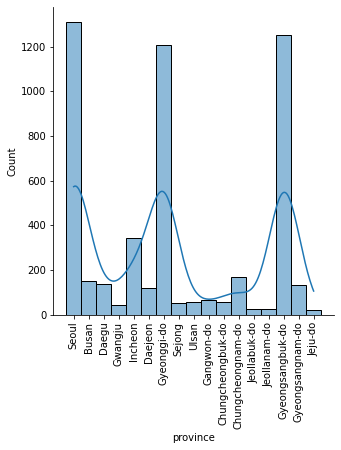

In [ ]:
sns.displot(df.province, kde=True)
plt.xticks(rotation=90)

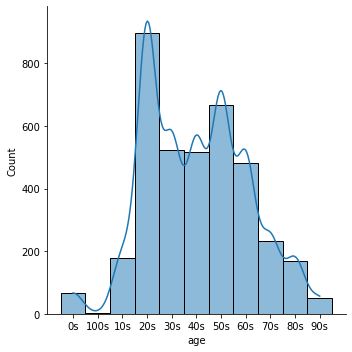

In [ ]:
sns.displot(df.age.sort_values(),kde=True)

## <font color = 'Orange'>Visualize the relationship between the attributes</font>

In [ ]:
ds_province_age = df.groupby(['province','age']).count()['patient_id'].reset_index()
ds_province_age.columns = ['Province','Age','count']
ds_province_age

,Province,Age,count
0,Busan,0s,7
1,Busan,10s,12
2,Busan,20s,51
3,Busan,30s,17
4,Busan,40s,15
...,...,...,...
138,Ulsan,30s,7
139,Ulsan,40s,5
140,Ulsan,50s,13
141,Ulsan,60s,4


In [ ]:
ds_province_infection = df.groupby(['province','infection_case']).count()['patient_id'].reset_index()
ds_province_infection.columns = ['Province','Infection','count']
ds_province_infection

,Province,Infection,count
0,Busan,Cheongdo Daenam Hospital,1
1,Busan,Onchun Church,32
2,Busan,Shincheonji Church,6
3,Busan,Suyeong-gu Kindergarten,3
4,Busan,contact with patient,45
...,...,...,...
127,Seoul,overseas inflow,306
128,Ulsan,Shincheonji Church,11
129,Ulsan,contact with patient,15
130,Ulsan,etc,7


In [ ]:
df.groupby(['infection_case','age']).count()['patient_id']

infection_case                   age
Biblical Language study meeting  30s     1
Bonghwa Pureun Nursing Home      30s     1
                                 40s     1
                                 50s     6
                                 60s     8
                                        ..
overseas inflow                  40s    68
                                 50s    57
                                 60s    46
                                 70s     6
                                 80s     1
Name: patient_id, Length: 151, dtype: int64

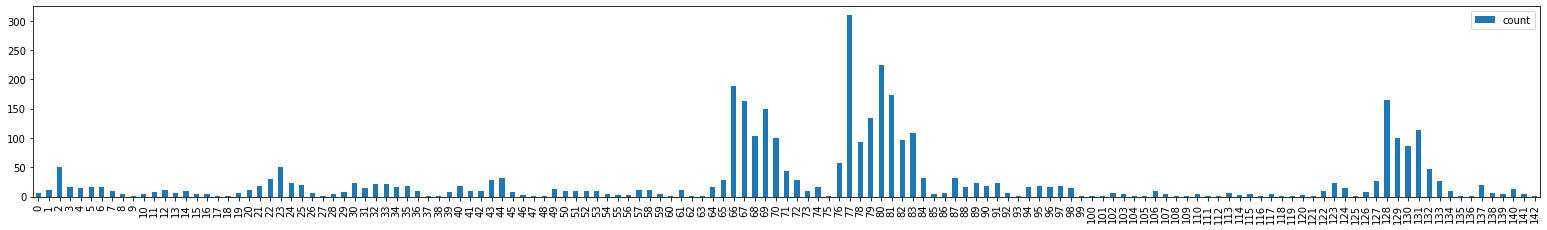

In [ ]:
ds_province_age.plot.bar()

In [ ]:
import plotly.express as px

In [ ]:
figure = px.box(
    ds_province_infection,
    x='Province',
    y='count',
)
figure.show()

## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


<Figure size 1944x252 with 0 Axes>

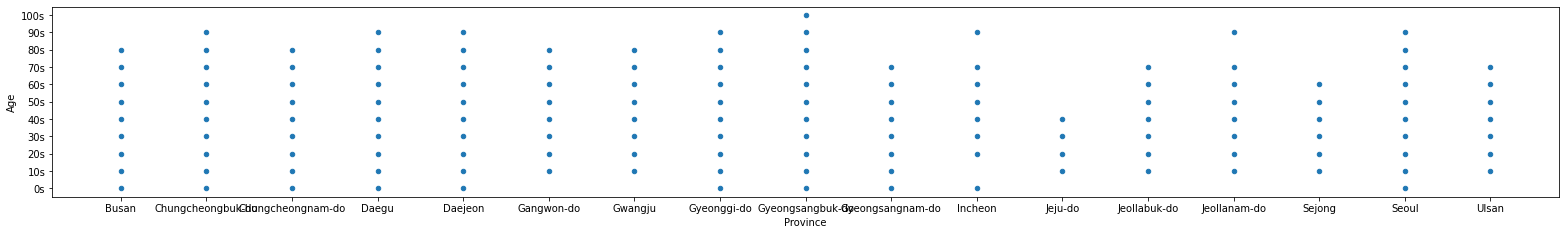

In [ ]:
fig = plt.figure()
ds_province_age.plot.scatter(x="Province",y="Age")

<Figure size 1944x252 with 0 Axes>

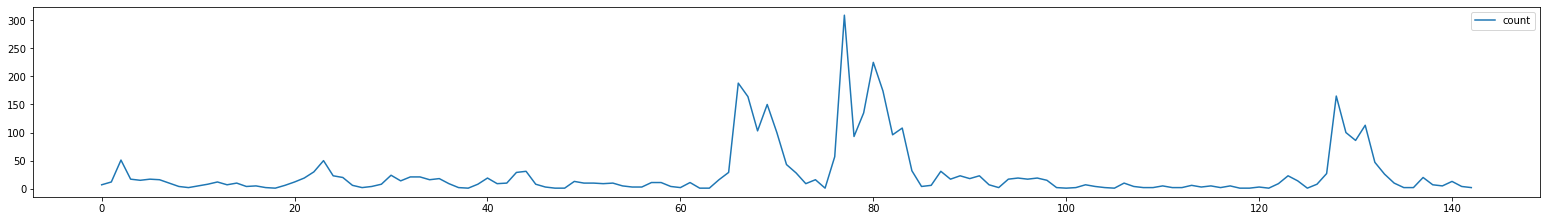

In [ ]:
fig = plt.figure()
ds_province_age.plot()

# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowladge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash



In [ ]:
import plotly.express as px

In [ ]:
pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.2 MB/s 


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install dash-bootstrap-components

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.4 MB/s 


In [ ]:
pip install jupyter_dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11449 sha256=6e49eb00689317d93333fcd753373d9188dd583f0494f8db50b29f43e40669c4
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
from jupyter_dash import JupyterDash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px
df = px.data.gapminder()

app = JupyterDash(__name__)

app.layout = html.Div(children = [
  dcc.Dropdown(id="year", value=2007, clearable=False,
    options=[{"label": y, "value": y} for y in df['year'].unique()]),
  dcc.Graph(id="graph", figure={})
])

@app.callback(Output('graph', 'figure'), Input('year', 'value'))
def cb(year):
    df_year = df.query("year == @year")
    return px.scatter(df_year, x="gdpPercap", y="lifeExp", size="pop",
          log_x=True, size_max=60, hover_name="country", height=400)
    
app.run_server(host='127.0.0.1', port=8888, debug=True)

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
df_copy

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
px.bar(
    df,
    x='age',
    y='infection_case'
)
